## T-Test

In [29]:
from chart_studio import plotly as py 
import plotly.graph_objs as go
from plotly.tools import FigureFactory as FF
import warnings
warnings.filterwarnings('ignore')

from tqdm.auto import tqdm
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu, ttest_ind, t

import numpy as np
import pandas as pd
from scipy import stats

In [30]:
data1 = np.random.normal(0, 1, size=10_000)
data2 = np.random.normal(2, 1, size=10_000)

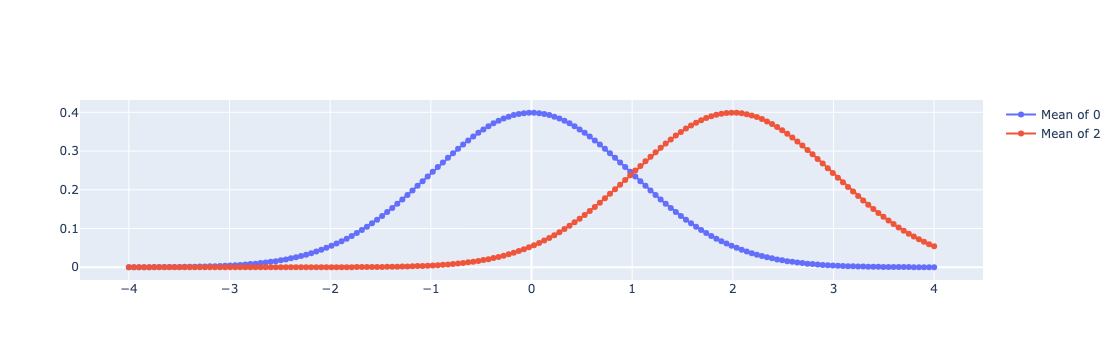

In [31]:
x = np.linspace(-4, 4, 160)
y1 = stats.norm.pdf(x)
y2 = stats.norm.pdf(x, loc=2)

trace1 = go.Scatter(
    x = x,
    y = y1,
    mode = 'lines+markers',
    name='Mean of 0'
)

trace2 = go.Scatter(
    x = x,
    y = y2,
    mode = 'lines+markers',
    name='Mean of 2'
)

fig = go.Figure()

fig.add_trace(trace1)
fig.add_trace(trace2)

fig.show()

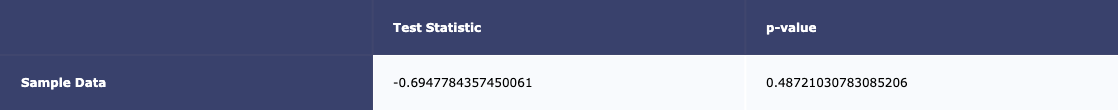

In [32]:
from plotly.figure_factory import create_table
true_mu = 0

onesample_results = stats.ttest_1samp(data1, true_mu)

matrix_onesample = [
    ['', 'Test Statistic', 'p-value'],
    ['Sample Data', onesample_results[0], onesample_results[1]]
]

onesample_table = create_table(matrix_onesample, index=True)
onesample_table

## Двусторонний

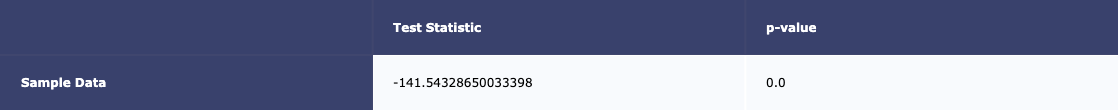

In [33]:
twosample_results = stats.ttest_ind(data1, data2)

matrix_twosample = [
    ['', 'Test Statistic', 'p-value'],
    ['Sample Data', twosample_results[0], twosample_results[1]]
]

twosample_table = create_table(matrix_twosample, index=True)
twosample_table

## T-test для НЕнормального распределения

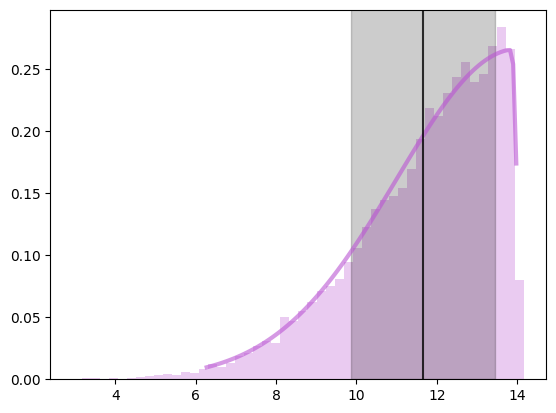

In [34]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats


alpha = 0.05
a = -50
loc = 14
scale = 3
x1 = np.linspace(stats.skewnorm.ppf(0.01, a, loc=loc, scale=scale), stats.skewnorm.ppf(0.99, a, loc=loc, scale=scale), 100)
skewed = stats.skewnorm.rvs(a, size=10000, loc=loc, scale=scale)
fig, ax = plt.subplots(1, 1)
ax.plot(x1, stats.skewnorm.pdf(x1, a, loc=loc, scale=scale), 'r-', lw=3, alpha=0.6, color='mediumorchid')
ax.hist(skewed, density=True, histtype='stepfilled', bins=50, alpha=0.3, color='mediumorchid')
ax.axvline(np.mean(skewed), ymax=1, color='black', alpha=0.8)
rect = matplotlib.patches.Rectangle((np.mean(skewed)-np.std(skewed),0), 2*np.std(skewed), 0.3, color='black', alpha=0.2)
ax.add_patch(rect)

In [35]:
samp_size = 10

results = []
for i in range(10000):
    sample1 = np.random.choice(skewed, samp_size)
    sample2 = np.random.choice(skewed, samp_size)
    _, pval = stats.ttest_ind(sample1, sample2)
    results.append(pval < alpha)
print(sum(results) / len(results))

0.0476


### Экспоненциальное распределение

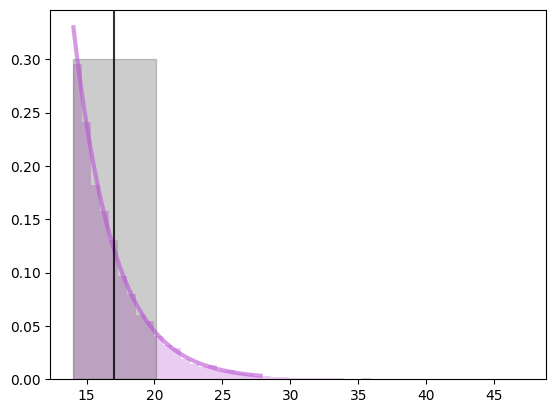

In [36]:
x1 = np.linspace(stats.expon.ppf(0.01, loc=loc, scale=scale), stats.expon.ppf(0.99, loc=loc, scale=scale), 100)
exponential = stats.expon.rvs(size=10000, loc=loc, scale=scale)
fig, ax = plt.subplots(1, 1)
ax.plot(x1, stats.expon.pdf(x1, loc=loc, scale=scale), 'r-', lw=3, alpha=0.6, color='mediumorchid')
ax.hist(exponential, density=True, histtype='stepfilled', bins=50, alpha=0.3, color='mediumorchid')
ax.axvline(np.mean(exponential), ymax=1, color='black', alpha=0.8)
rect = matplotlib.patches.Rectangle((np.mean(exponential)-np.std(exponential),0), 2*np.std(exponential), 0.3, color='black', alpha=0.2)
ax.add_patch(rect)

plt.show()

In [41]:
samp_size = 10

results = []
for i in range(10000):
    sample1 = np.random.choice(exponential, samp_size)
    sample2 = np.random.choice(exponential, samp_size)
    _, pval = stats.ttest_ind(sample1, sample2)
    results.append(pval < alpha)
print(sum(results) / len(results))

0.045


### Нормальное

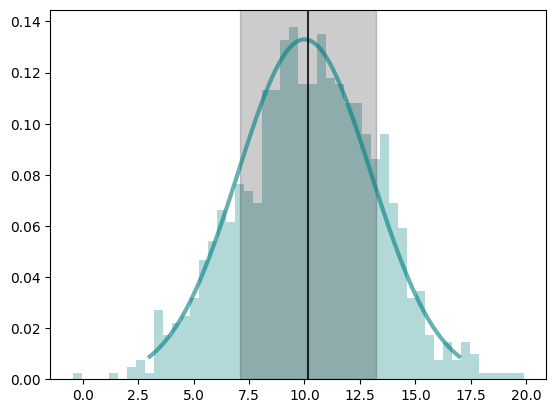

In [43]:
loc = 10
scale = 3
x2 = np.linspace(stats.norm.ppf(0.01, loc=loc, scale=scale), stats.norm.ppf(0.99, loc=loc, scale=scale), 100)
normal = stats.norm.rvs(size=1000, loc=loc, scale=scale)
fig, ax = plt.subplots(1, 1)
ax.plot(x2, stats.norm.pdf(x2, loc=loc, scale=scale), 'r-', lw=3, alpha=0.6, color='teal')
ax.hist(normal, density=True, histtype='stepfilled', bins=50, alpha=0.3, color='teal')
ax.axvline(np.mean(normal), ymax=1, color='black', alpha=0.8)
rect = matplotlib.patches.Rectangle((np.mean(normal)-np.std(normal),0), 2*np.std(normal), 0.3, color='black', alpha=0.2)
ax.add_patch(rect)

In [46]:
samp_size = 10

results = []
for i in range(10000):
    sample1 = np.random.choice(normal, samp_size)
    sample2 = np.random.choice(normal, samp_size)
    _, pval = stats.ttest_ind(sample1, sample2)
    results.append(pval < 0.05)
print(sum(results) / len(results))

0.054


### Mann Whitney


In [47]:
import numpy as np
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu, ttest_ind, t

In [48]:
data1 = 5 * np.random.randn(1000) + 50 # среднее 50, дисперсия 25
data2 = 5 * np.random.randn(1000) + 51 # среднее 51, дисперсия 25

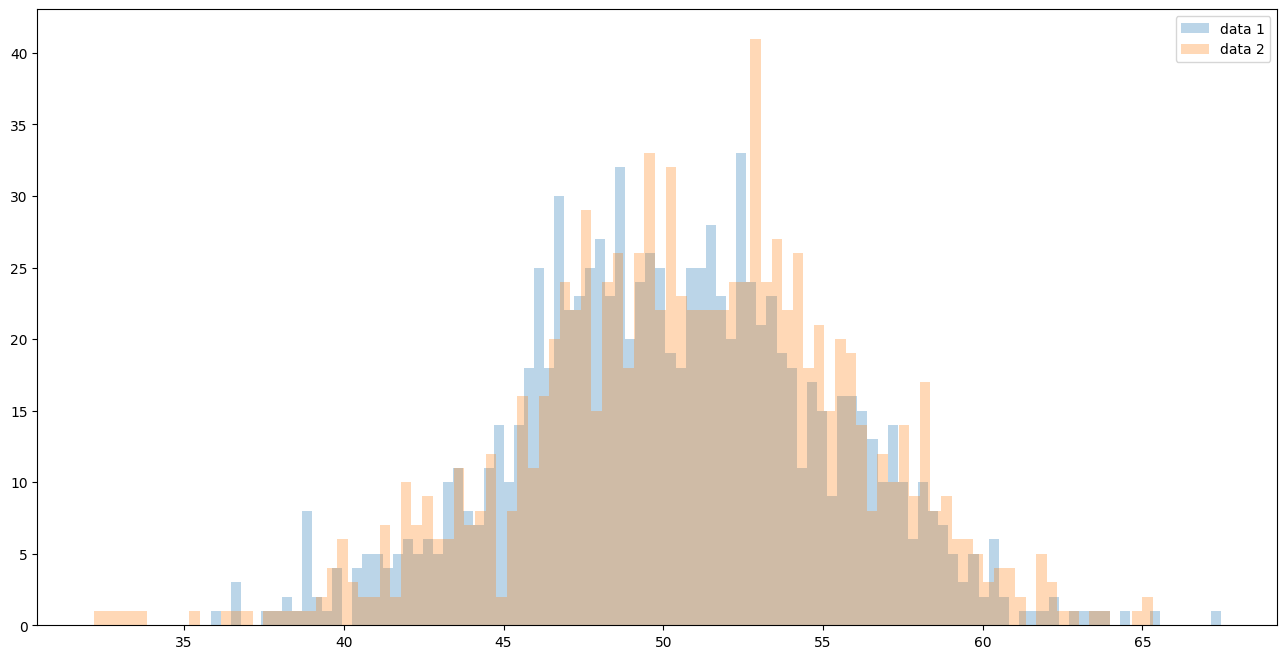

In [49]:
plt.figure(figsize=(16, 8))
plt.hist(data1, bins=100, alpha=0.3, label='data 1')
plt.hist(data2, bins=100, alpha=0.3, label= 'data 2')
plt.legend()
plt.show()

In [50]:
stat, p = mannwhitneyu(data1, data2)
print(f'Statistics={stat}, p={p}')
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Statistics=462063.0, p=0.003305349515439587
Different distribution (reject H0)


In [51]:
num_tests = 10000

In [52]:
counter_acc = 0
stats_same = []
for i in tqdm(range(num_tests)):
    data1 = 5 * np.random.randn(1000) + 50
    data2 = 5 * np.random.randn(1000) + 50
    stat, p = mannwhitneyu(data1, data2)
    counter_acc += p > alpha
    stats_same.append(stat)

# второе число - доля принятия альтернативной гипотезу, при условии что различий нет
# это вероятность ошибки первого рода
counter_acc, (num_tests - counter_acc) / num_tests

100%|█████████████████████████████████████████████████████████████████| 10000/10000 [00:09<00:00, 1058.45it/s]


(9504, 0.0496)

In [53]:
counter_acc = 0
stats_diff = []
for i in tqdm(range(num_tests)):
    data1 = 5 * np.random.randn(1000) + 50
    data2 = 5 * np.random.randn(1000) + 51
    stat, p = mannwhitneyu(data1, data2)
    counter_acc += p > alpha
    stats_diff.append(stat)

100%|█████████████████████████████████████████████████████████████████| 10000/10000 [00:09<00:00, 1058.34it/s]


In [54]:
# первое число - доля принятия нулевой гипотезы при условии, что верна альтернативная
# это вероятность ошибки 2 рода

counter_acc / num_tests, num_tests - counter_acc

(0.0064, 9936)

## Суть теста: найти такую статистику, в которой малейшее изменения в параметре приводят к сильным изменениям в статистике


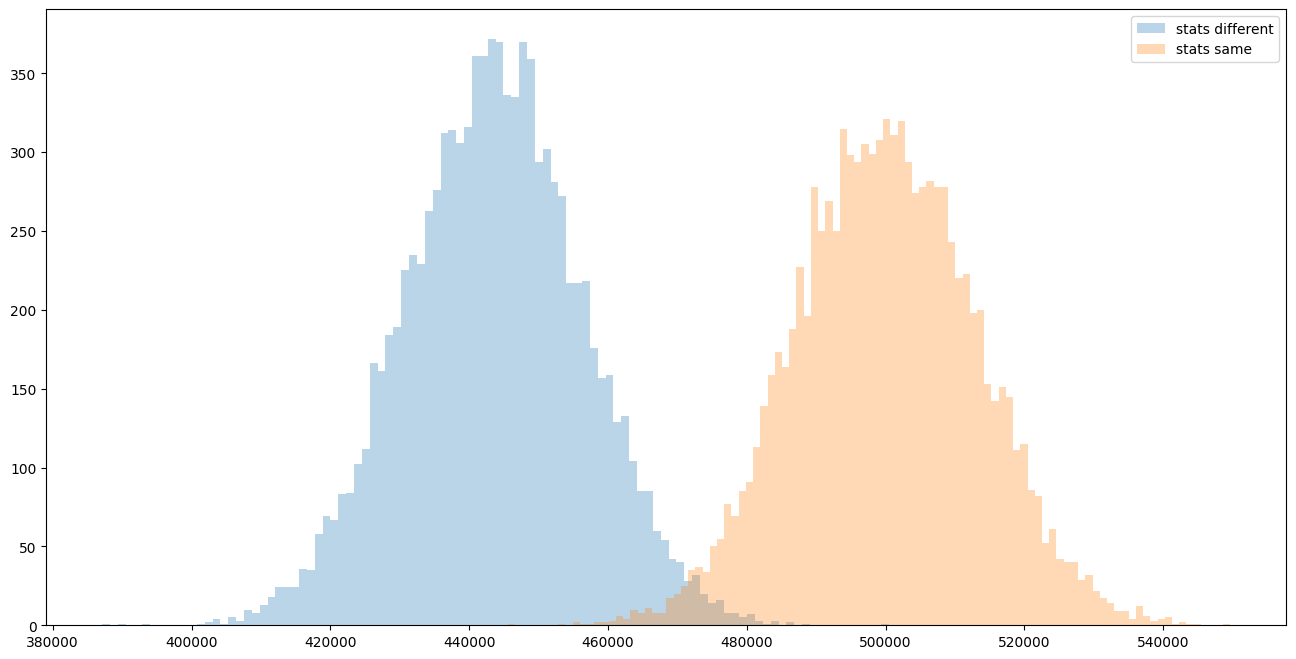

In [55]:
plt.figure(figsize=(16, 8))
plt.hist(stats_diff, bins=100, alpha=0.3,label='stats different')
plt.hist(stats_same, bins=100, alpha=0.3, label='stats same')
plt.legend()
plt.show()

## Сплитовалка

In [81]:
from dateutil.relativedelta import relativedelta
from sklearn.preprocessing import StandardScaler
data = pd.read_csv('sample_data_1.csv')

## Разобьем очень странным способом. Половину выборки в одну группу, другую в другую

In [82]:
data['treatment'] = [0] * (len(data) // 2) + [1] * (len(data) // 2  + 1)

### Возьмем тритмент группу (тестовую) и контрольную группу и проведем между ними т-тест


In [83]:
treated_group = data.loc[data['treatment'] == 1]['pnl_rub']
control_group = data.loc[data['treatment'] == 0]['pnl_rub']
stat, p = ttest_ind(treated_group, control_group)

stat, p

(9.46761481578222, 3.1389278542200025e-21)

## Разобьем с солью и хешем

In [84]:
from tqdm import tqdm_notebook
import hashlib
import pandas
import scipy.stats
from sklearn.metrics import mutual_info_score
import statsmodels.api as sm

def ab_split(id, salt, control_group_size):
    '''
    Returns 't' (for test) or 'c' (for control), based on the ID and salt.
    The control_group_size is a float, between 0 and 1, that sets how big the
    control group is.
    '''
    
    test_id = str(id) + '-' + str(salt)
    test_id_digest = hashlib.md5(test_id.encode('ascii')).hexdigest()
    test_id_first_digits = test_id_digest[:6]
    test_id_final_int = int(test_id_first_digits, 16)
    ab_split = (test_id_final_int/0xFFFFFF)
    
    if ab_split > control_group_size:
        return 0
    else:
        return 1

In [85]:
data['treatment_with_salt'] = data.uid.apply(lambda uid: ab_split(uid, 'test-1', 0.5))

### Проведем снова тест и увидим, что даже случайным разбиением группы по средним похожи (не отвергается 0 гипотеза о равенстве средних при уровне значимости 0.05)

In [86]:
treated_group = data.loc[data['treatment_with_salt'] == 1]['pnl_rub']
control_group = data.loc[data['treatment_with_salt'] == 0]['pnl_rub']
stat, p = ttest_ind(treated_group, control_group)

stat, p

(1.496659096520079, 0.1344961617650426)

# A/A тесты

## Тест, который сходится

In [87]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

from tqdm.auto import tqdm
# np.random.seed(42)

100%|████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 473.61it/s]


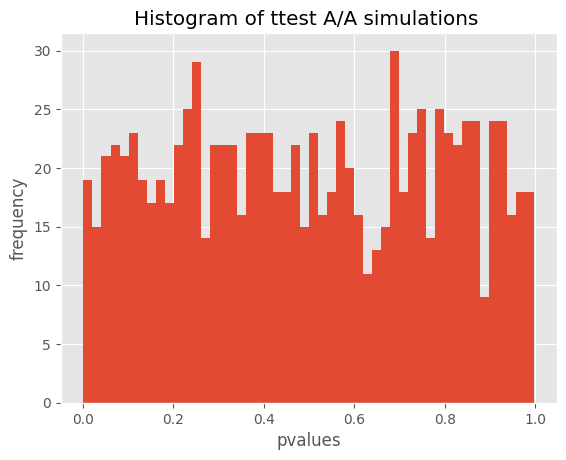

0.044

In [88]:
n = 100_000
simulations = 1000
n_s = 1000
res = []

df = pd.DataFrame({
    "s1": np.random.exponential(scale=1/0.001, size=n),
    "s2": np.random.exponential(scale=1/0.001, size=n)
})

# Запуск симуляций A/A теста
for i in tqdm(range(simulations)):
    s1 = df['s1'].sample(n_s, replace = False).values
    s2 = df['s2'].sample(n_s, replace = False).values
    res.append(stats.ttest_ind(s1, s2, equal_var = False)[1]) # сохраняем pvalue

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

# Проверяем, что количество ложноположительных случаев не превышает альфа
sum(np.array(res) <0.05) / simulations

In [89]:
# Проверяем О1Р (количество ложноположительных прокрасов при условии, что различий нет)
sum(np.array(res) < 0.05) / simulations

0.044

In [90]:
from scipy.stats import kstest, uniform

def is_uniform(sample, significance_level):
    # Perform the Kolmogorov-Smirnov test
    _, p_value = kstest(sample, uniform.cdf)

    return p_value

significance_level = 0.05
# Example usage
p_value = is_uniform(res, significance_level)

if p_value > significance_level:
    print("Uniform")  # Sample distribution is likely uniform
else:
    print("Not Uniform")  # Sample distribution is not likely uniform

p_value

Uniform


0.9028190415128603

## A/A-тест не сходится


100%|████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 482.13it/s]


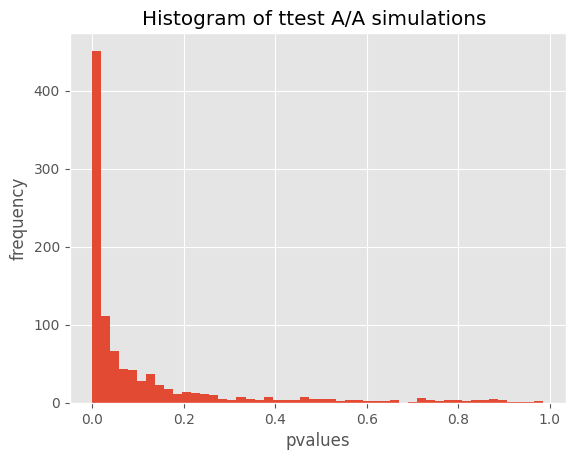

0.606

In [91]:
n = 100000
simulations = 1000
n_s = 1000
res = []

df = pd.DataFrame({
    "s1": np.random.exponential(scale=1/0.001, size=n),
    "s2": np.random.exponential(scale=1/0.001, size=n) * 1.1 # добавляем эффект 10%
})

for i in tqdm(range(simulations)):
    s1 = df['s1'].sample(n_s, replace = False).values
    s2 = df['s2'].sample(n_s, replace = False).values
    res.append(stats.ttest_ind(s1, s2, equal_var = False)[1])

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

# FPR не сойдется
sum(np.array(res) < significance_level) / simulations

In [92]:
# FPR не сойдется
sum(np.array(res) < significance_level) / simulations

0.606

In [93]:
significance_level = 0.05
# Example usage
p_value = is_uniform(res, significance_level)

if p_value > significance_level:
    print("Uniform")  # Sample distribution is likely uniform
else:
    print("Not Uniform")  # Sample distribution is not likely uniform

p_value

Not Uniform


0.0